<a href="https://colab.research.google.com/github/fahim19dipu/Handwritten_Project/blob/master/course_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (1.0.1)


In [72]:

from __future__ import absolute_import,division,print_function

import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)

import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

tf.enable_eager_execution()

1.13.1


In [0]:
dataset,metadata = tfds.load('mnist', as_supervised=True , with_info = True)
train_dataset,test_dataset = dataset['train'],dataset['test']

In [74]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples : {}".format(num_train_examples))

print("Number of testing examples : {}".format(num_test_examples))

Number of training examples : 60000
Number of testing examples : 10000


In [0]:
def normalize(images,labels):
  images = tf.cast(images,tf.float32)
  images /=255
  return images,labels
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

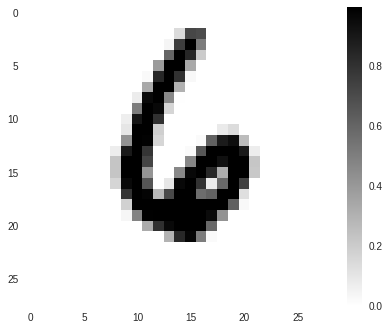

In [76]:
for image,label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

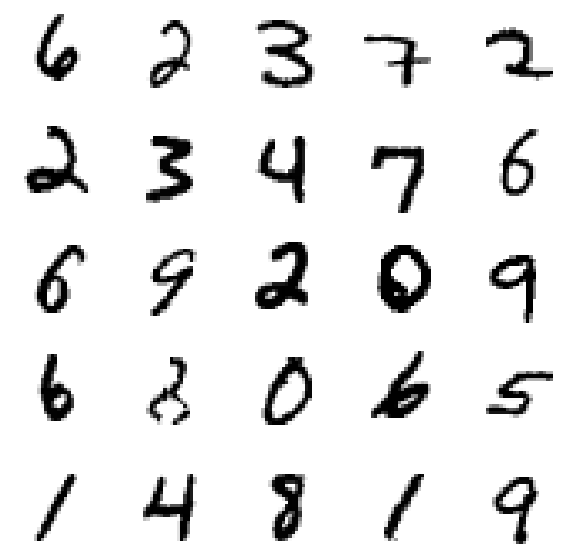

In [77]:
plt.figure(figsize=(10,10))
i=0
for (image,label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image,cmap=plt.cm.binary)
  #plt.xlabel([label])
  i+=1
plt.show()
  

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28,1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
    
])

In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [82]:
model.fit(train_dataset, epochs=5 ,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2513 - acc: 0.9281
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1064 - acc: 0.9682
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0752 - acc: 0.9771
Epoch 4/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0545 - acc: 0.9841
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0439 - acc: 0.9864


In [83]:
test_loss, test_accuracy =model.evaluate(test_dataset,steps = math.ceil(num_test_examples/32))
print("Accuracy on test dataset : ",test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.0725 - acc: 0.9784
Accuracy on test dataset :  0.9784


In [0]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [85]:
predictions.shape

(32, 10)

In [87]:
i=0
for i in range(30):
  print(np.argmax(predictions[i]))
  

6
2
3
7
2
2
3
4
7
6
6
9
2
0
9
6
2
0
6
5
1
4
8
1
9
8
4
0
0
5
